In [33]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [38]:
# Install TensorFlow if not available
try:
    import tensorflow as tf
    from tensorflow.keras import layers, models
except ModuleNotFoundError:
    print("TensorFlow not found. Installing TensorFlow...")
    os.system('pip install tensorflow')
    import tensorflow as tf
    from tensorflow.keras import layers, models

In [40]:
# Data Preparation
labels = ['PNEUMONIA', 'NORMAL']
img_size = 222


In [42]:
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        if not os.path.exists(path):
            print(f"Error: Path '{path}' not found. Please check the dataset location.")
            return np.array([])
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = Image.open(os.path.join(path, img)).convert('L')
                resized_arr = img_arr.resize((img_size, img_size))
                data.append([np.array(resized_arr), class_num])
            except Exception as e:
                print(e)
    return np.array(data)

LOADING DATASET

In [82]:
train = get_data('D:/archive (1)/chest_xray/chest_xray/train')
test = get_data('D:/archive (1)/chest_xray/chest_xray/test')
val = get_data('D:/archive (1)/chest_xray/chest_xray/val')


Loading data from: D:/archive (1)/chest_xray/chest_xray/train
Found 5216 files belonging to 2 classes.
Data loaded from D:/archive (1)/chest_xray/chest_xray/train
Loading data from: D:/archive (1)/chest_xray/chest_xray/test
Found 624 files belonging to 2 classes.
Data loaded from D:/archive (1)/chest_xray/chest_xray/test
Loading data from: D:/archive (1)/chest_xray/chest_xray/val
Found 16 files belonging to 2 classes.
Data loaded from D:/archive (1)/chest_xray/chest_xray/val


In [125]:
pneumonia = r'D:\archive (1)\chest_xray\chest_xray\train\PNEUMONIA'
pneumonia_dir = r'D:\archive (1)\chest_xray\chest_xray\train\PNEUMONIA'

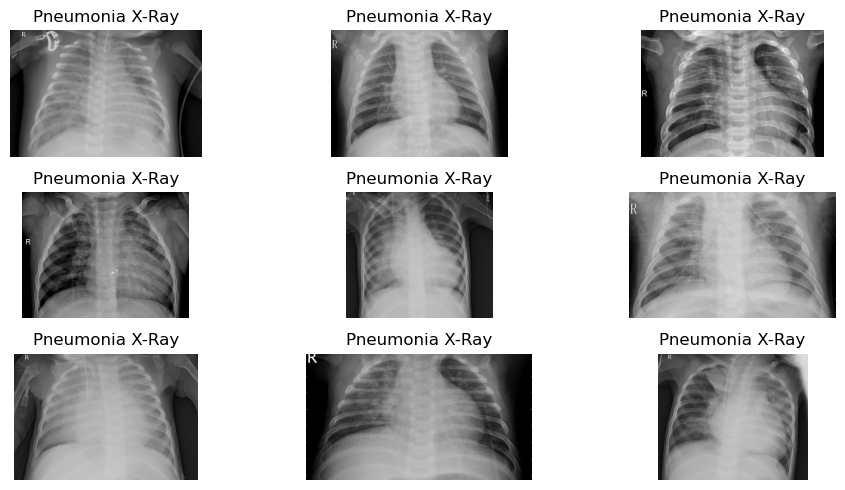

In [133]:
import os
import matplotlib.pyplot as plt

# directory
pneumonia_dir = r'D:\archive (1)\chest_xray\chest_xray\train\PNEUMONIA'

# List all files in the pneumonia directory
pneumonia = os.listdir(pneumonia_dir)

# Filter the list to only include valid image files
image_files = [file for file in pneumonia if file.endswith(('.jpg', '.jpeg', '.png'))]

# Check if there are at least 9 images to display
if len(image_files) >= 9:
    plt.figure(figsize=(10, 5))

    for i in range(9):
        plt.subplot(3, 3, i + 1)
        img_path = os.path.join(pneumonia_dir, image_files[i])  
        img = plt.imread(img_path)  
        plt.imshow(img, cmap='gray')  
        plt.axis('off')  
        plt.title("Pneumonia X-Ray")
    
    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()
else:
    print("Not enough valid images found in the directory.")


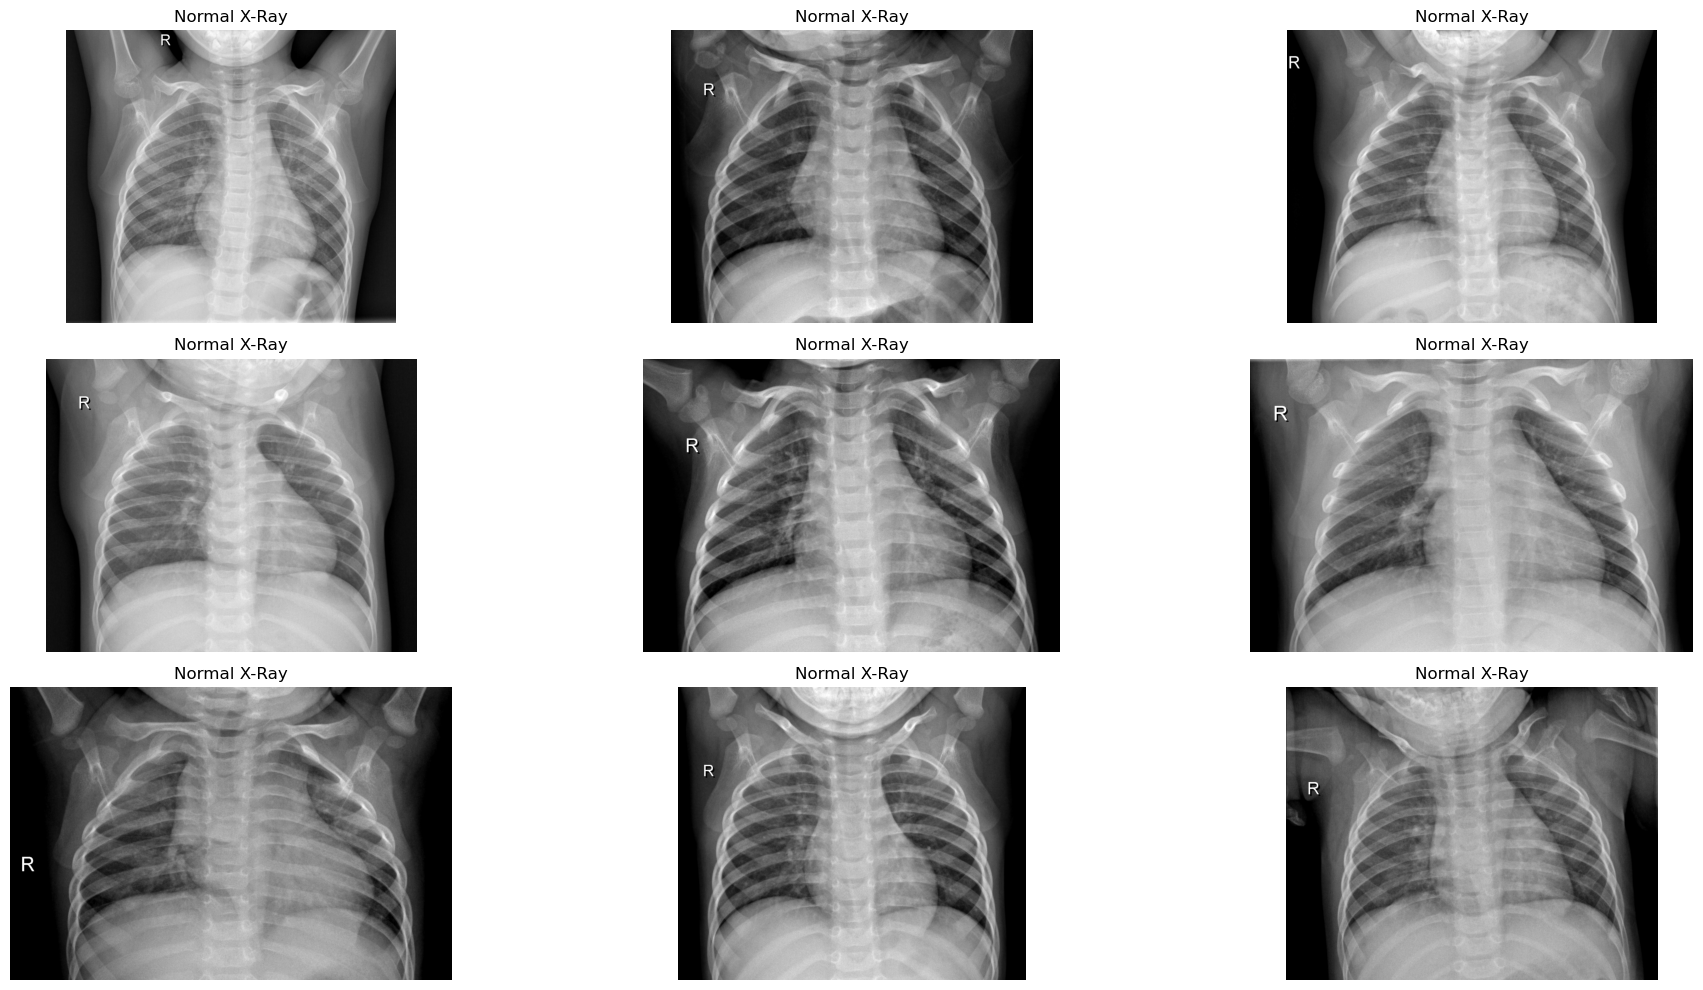

In [135]:
import os
import matplotlib.pyplot as plt

normal_dir = r'D:\archive (1)\chest_xray\chest_xray\train\NORMAL'

# List all files in the normal directory
normal_files = os.listdir(normal_dir)

# Filter the list to only include valid image files (optional, in case there are non-image files)
image_files = [file for file in normal_files if file.endswith(('.jpg', '.jpeg', '.png'))]

# Ensure that there are at least 9 valid images to plot
if len(image_files) >= 9:
    plt.figure(figsize=(20, 10))

    for i in range(9):
        plt.subplot(3, 3, i + 1)
        img_path = os.path.join(normal_dir, image_files[i]) 
        img = plt.imread(img_path)  
        plt.imshow(img, cmap='gray')  
        plt.axis('off')  
        plt.title("Normal X-Ray")

    plt.tight_layout()  
    plt.show()
else:
    print("Not enough valid images found in the directory.")


In [155]:

for i in train.take(1):  
    print(i[1])


tf.Tensor(
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]], shape=(32, 2), dtype=float32)


C:\Users\dil\AppData\Local\Temp\ipykernel_19920\178301035.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette=custom_colors)


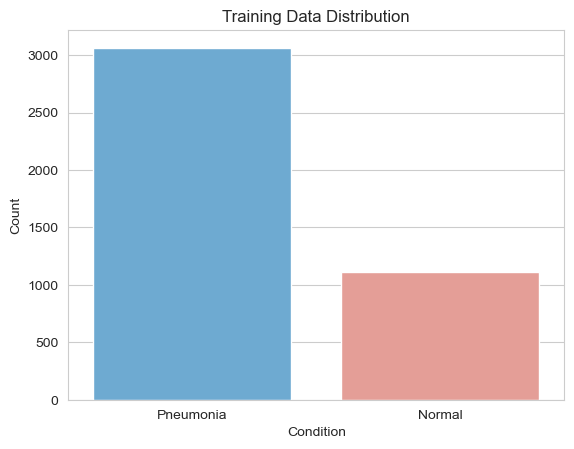

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

labels = []
for images, lbls in train_data:
    labels.extend(["Normal" if label == 0 else "Pneumonia" for label in lbls.numpy()])  # swapped!


sns.set_style('whitegrid')
custom_colors = ['#5DADE2', '#F1948A']  # blue for pneumonia, pink for normal

sns.countplot(x=labels, palette=custom_colors)
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Training Data Distribution')
plt.show()


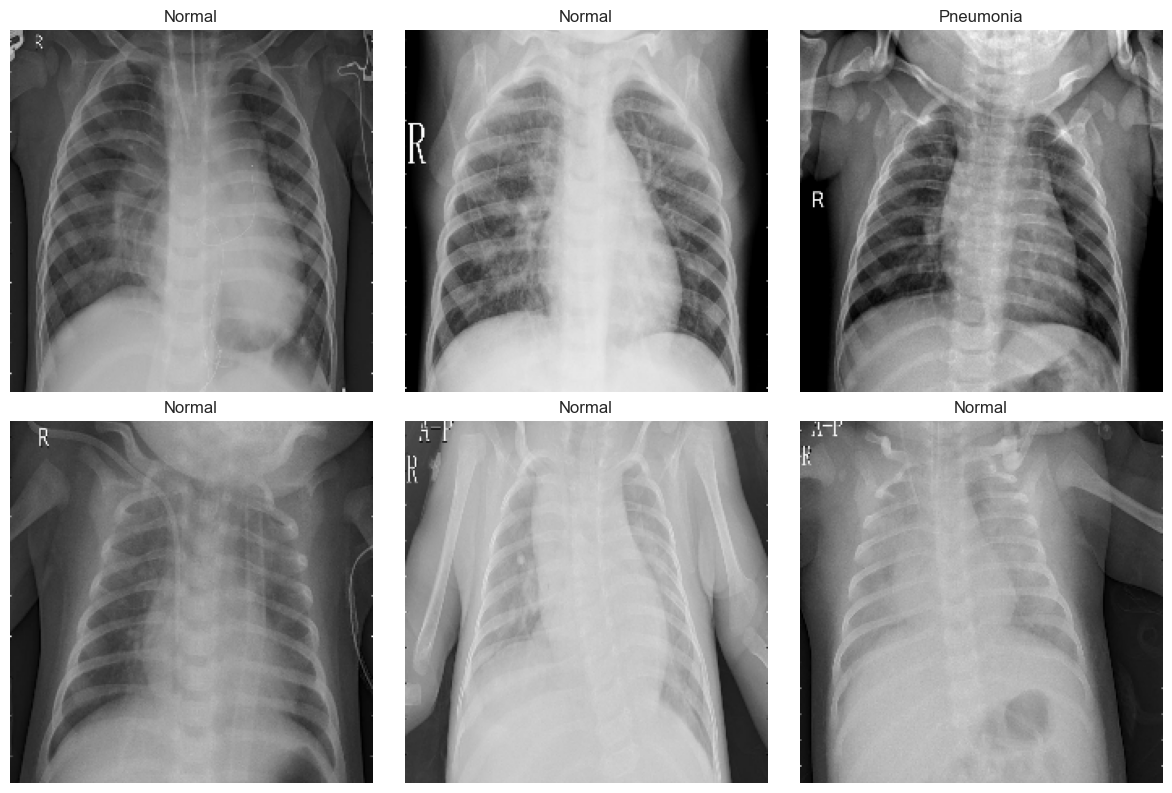

In [170]:
import matplotlib.pyplot as plt
import numpy as np

# Extract a batch from the training data
first_batch = next(iter(train_data))
images, labels = first_batch

# Plot multiple images (up to 6 images)
plt.figure(figsize=(12, 8))
for i in range(min(6, len(images))):
    plt.subplot(2, 3, i + 1)
    img = images[i].numpy().astype("uint8")
    label_value = labels[i].numpy().item() if labels[i].ndim == 0 else np.argmax(labels[i].numpy())
    plt.imshow(img, cmap='gray')
    plt.title("Pneumonia" if label_value == 0 else "Normal")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [183]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [200]:
import tensorflow as tf

IMG_SIZE = 150  

def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0  
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    return image, label
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train.map(preprocess, num_parallel_calls=AUTOTUNE).shuffle(1000).batch(BATCH_SIZE).prefetch(AUTOTUNE)
val_ds = val.map(preprocess, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)
test_ds = test.map(preprocess, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomWidth(0.1),
    layers.RandomHeight(0.1),
])


In [198]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up data augmentation generator
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)




In [204]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()
model.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', input_shape=(150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))

model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))

model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))

model.add(Conv2D(128, (3,3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))

model.add(Conv2D(256, (3,3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\dil\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 38, 38, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 38, 38, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 19, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 19, 19, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 19, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 19, 19, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 1,246,401 (4.75 MB)

 Trainable params: 1,245,313 (4.75 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [244]:
import numpy as np

x_test_np = np.array(x_test)
y_test_np = np.array(y_test)

print("x_test shape:", x_test_np.shape)
print("y_test shape:", y_test_np.shape)


x_test shape: (624, 150, 150, 3)
y_test shape: (624, 2)


Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Epoch 1/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - accuracy: 0.7567 - loss: 0.5540 - val_accuracy: 0.6875 - val_loss: 0.6610
Epoch 2/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.9281 - loss: 0.1934 - val_accuracy: 0.8125 - val_loss: 0.3009
Epoch 3/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 163s 995ms/step - accuracy: 0.9451 - loss: 0.1467 - val_accuracy: 0.8750 - val_loss: 0.3186
Epoch 4/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - accuracy: 0.9684 - loss: 0.1032 - val_accuracy: 0.8750 - val_loss: 0.2686
Epoch 5/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.9623 - loss: 0.1066 - val_accuracy: 0.9375 - val_loss: 0.2784
Epoch 6/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.9675 - loss: 0.0880 - val_accuracy: 0.8125 - val_loss: 0.2361
Epoch 7/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.9651 - loss: 0.0859 - val_accuracy: 

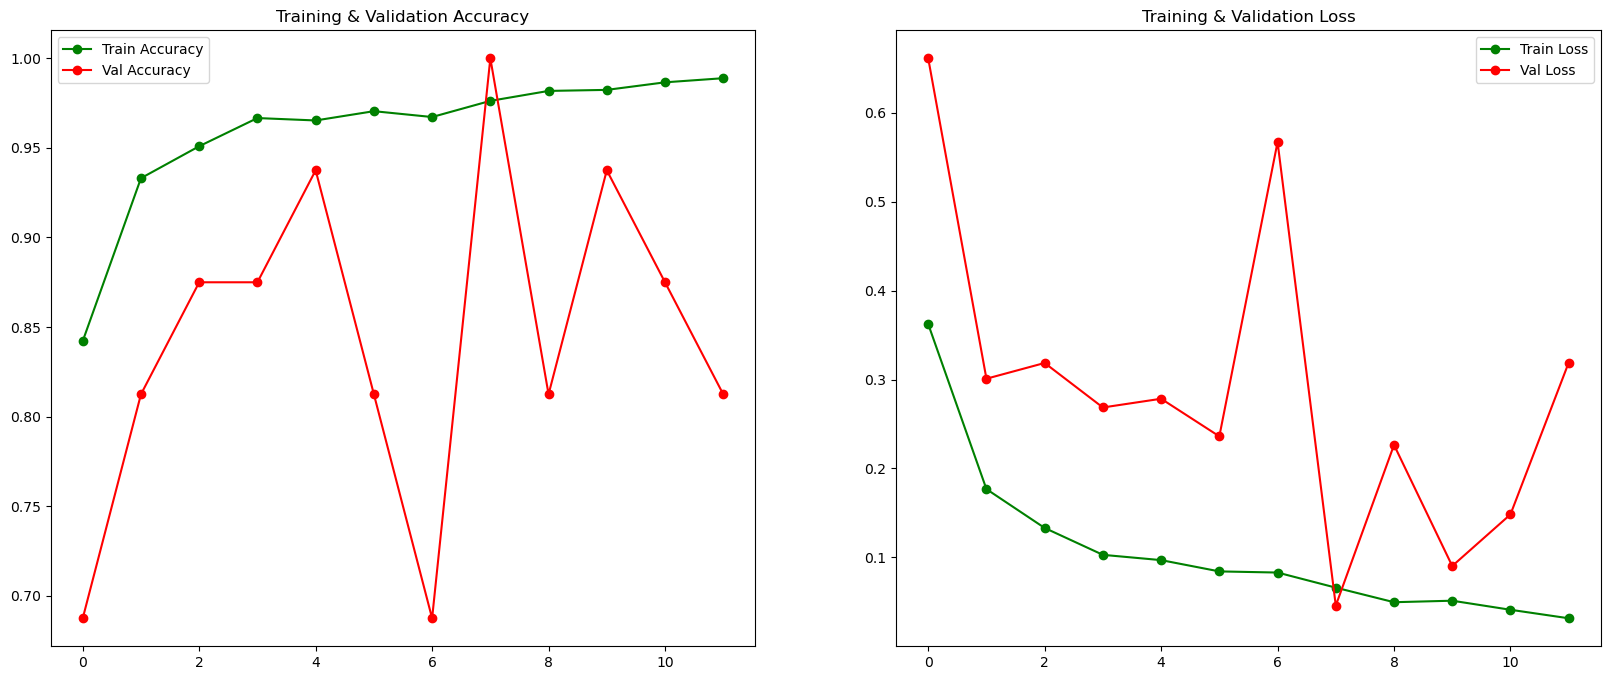

In [65]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 12

# Load datasets (no need for validation_split)
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    r"D:\archive (1)\chest_xray\train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    r"D:\archive (1)\chest_xray\val",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r"D:\archive (1)\chest_xray\test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

# Normalize images
normalization_layer = layers.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
val_data = val_data.map(lambda x, y: (normalization_layer(x), y))
test_data = test_data.map(lambda x, y: (normalization_layer(x), y))

# Define CNN model
model = models.Sequential([
    layers.InputLayer(input_shape=(*IMG_SIZE, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])

# Train the model
history = model.fit(train_data, validation_data=val_data, epochs=EPOCHS)

# Evaluate the model
loss, acc = model.evaluate(test_data)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {acc*100:.2f}%")

# Plot training results
epochs_range = range(EPOCHS)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, 'go-', label='Train Accuracy')
plt.plot(epochs_range, val_acc, 'ro-', label='Val Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, 'g-o', label='Train Loss')
plt.plot(epochs_range, val_loss, 'r-o', label='Val Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()


In [97]:
import numpy as np

# Make predictions on test data
y_pred_probs = model.predict(test_data)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Show first 15 predicted class labels
print("First 15 predicted classes:", y_pred_classes[:15])


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step
First 15 predicted classes: [0 1 1 1 1 1 0 1 1 1 1 1 1 1 1]


In [101]:
from sklearn.metrics import classification_report

# Extract true labels from test_data
y_true = np.concatenate([y for x, y in test_data], axis=0)

# Get predicted classes
y_pred = np.argmax(model.predict(test_data), axis=1)

# Print classification report
print(classification_report(y_true, y_pred, target_names=['Pneumonia (Class 0)', 'Normal (Class 1)']))


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step
                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.96      0.40      0.57       234
   Normal (Class 1)       0.73      0.99      0.84       390

           accuracy                           0.77       624
          macro avg       0.85      0.70      0.70       624
       weighted avg       0.82      0.77      0.74       624



In [105]:
from sklearn.metrics import confusion_matrix
import numpy as np

# True labels from test dataset
y_true = np.concatenate([y for x, y in test_data], axis=0)

# Predicted labels from the model
y_pred = np.argmax(model.predict(test_data), axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 228ms/step
[[ 94 140]
 [  4 386]]


In [109]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming `y_true` and `y_pred` already defined
cm = confusion_matrix(y_true, y_pred)

# Convert to DataFrame with labeled indices and columns
cm_df = pd.DataFrame(cm, index=['0', '1'], columns=['0', '1'])
print(cm_df)


    0    1
0  94  140
1   4  386


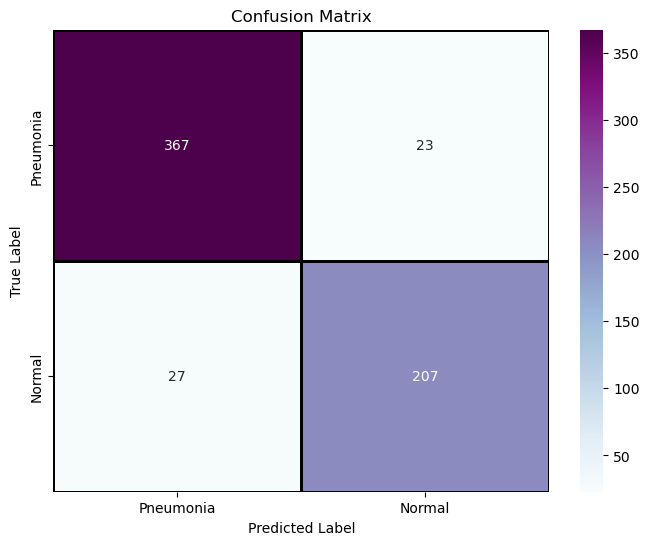

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

# Sample confusion matrix 
cm = np.array([[367,  23],
               [ 27, 207]])

cm_df = pd.DataFrame(cm, index=['Pneumonia (0)', 'Normal (1)'], columns=['Pneumonia (0)', 'Normal (1)'])

labels = ['Pneumonia', 'Normal']
#  heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, cmap="BuPu", linecolor='black', linewidths=1, annot=True, fmt='d', 
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 252ms/step


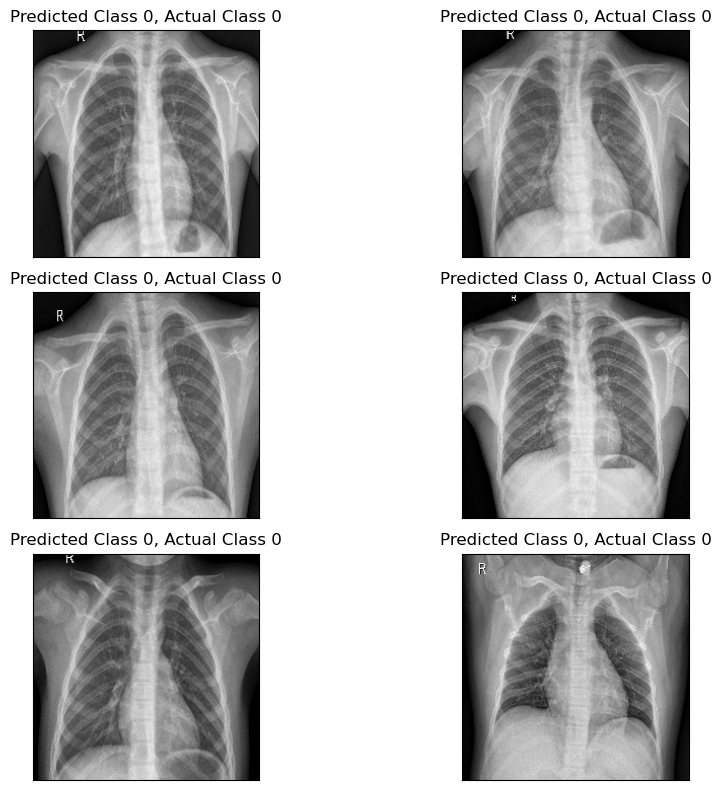

In [129]:
import numpy as np

# Predict class probabilities
y_pred_probs = model.predict(test_data)
predictions = np.argmax(y_pred_probs, axis=1)

# Extract true labels from test_data
y_test = np.concatenate([y for x, y in test_data], axis=0)

# Extract test images
x_test = np.concatenate([x for x, y in test_data], axis=0)

# Find correctly predicted indices
correct = np.where(predictions == y_test)[0]

# Plot first 6 correctly predicted grayscale images
plt.figure(figsize=(10, 8))

for i, c in enumerate(correct[:6]):
    plt.subplot(3, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

    # Convert to grayscale if needed
    if x_test[c].shape[-1] == 1:
        plt.imshow(x_test[c].reshape(x_test[c].shape[0], x_test[c].shape[1]), cmap='gray')
    else:
        plt.imshow(np.mean(x_test[c], axis=-1), cmap='gray')
    
    plt.title(f"Predicted Class {predictions[c]}, Actual Class {y_test[c]}")

plt.show()


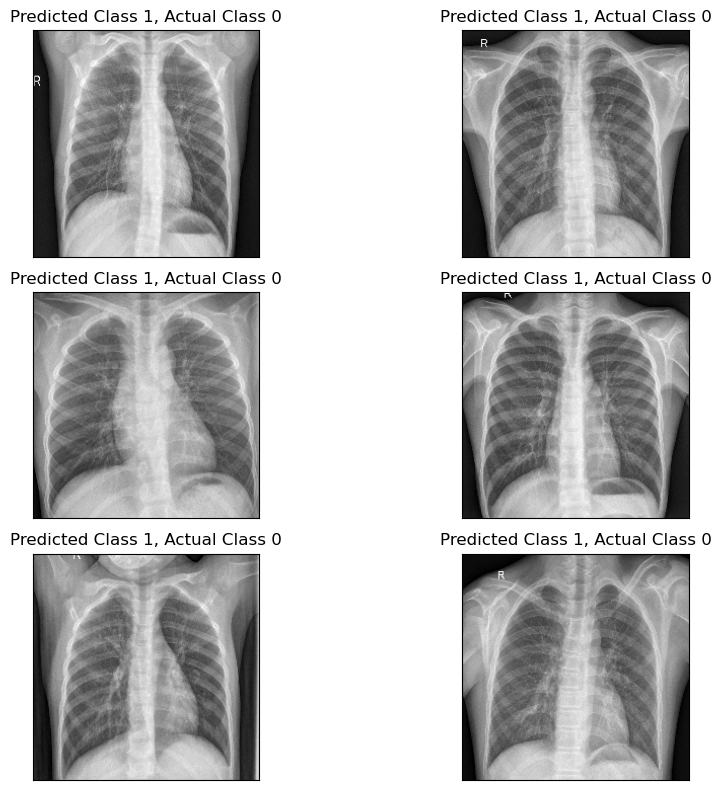

In [131]:
import matplotlib.pyplot as plt
import numpy as np

# Get incorrect indices
incorrect = np.where(predictions != y_test)[0]

# Plot first 6 incorrect predictions
plt.figure(figsize=(10, 8))

for i, c in enumerate(incorrect[:6]):
    plt.subplot(3, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

    if x_test[c].shape[-1] == 1:
        plt.imshow(x_test[c].reshape(x_test[c].shape[0], x_test[c].shape[1]), cmap='gray')
    else:
        plt.imshow(np.mean(x_test[c], axis=-1), cmap='gray')

    plt.title(f"Predicted Class {predictions[c]}, Actual Class {y_test[c]}")

plt.show()


In [135]:
model.save("my_model.keras")
